<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1> Autoencoders as Matrices </h1> 

<h2>Table of Contents</h2>
<p>In this lab, we will look at autoencoders as matrices. We will see how changing the shape in the shape of the latent space will changing the shape output. 
  </p>

<ul>
    <li><a href="#2D">Autoencoders with 2D Latent Space as Matrice</a></li>
    <li><a href="#1D"> Autoencoders with 1D Latent Space as Matrices </a></li>
 
</ul>

<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>

We'll need the following libraries:

In [2]:
# These are the libraries we are going to use in the lab.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import torch
import torch.nn as nn

<h2 id="2D">Autoencoders with 2D Latent Space = as Matrices</h2>

Create an Autoencoder custom module  or class:

In [3]:
class AutoEncoder(nn.Module): 
  
    def __init__(self, input_dim=256, encoding_dim=32):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Linear(input_dim,encoding_dim,bias=False)
        self.decoder = nn.Linear(encoding_dim,input_dim,bias=False)
    
  
    def forward(self, x):
 
        x=self.encoder(x)
        x=self.decoder(x)
      
        return x

We Create an Autoencoder object with a 2D input and 2D latent space as shown in the image.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/DL0110EN/Version_3/Chapter_10/images/autencoderlinear2_2_2.png" width="500" alt="cognitiveclass.ai logo" />

In [4]:
auto_encoder_2Dcode=AutoEncoder(2,2)
auto_encoder_2Dcode

AutoEncoder(
  (encoder): Linear(in_features=2, out_features=2, bias=False)
  (decoder): Linear(in_features=2, out_features=2, bias=False)
)

As the weights are randomly initialized, we set them the orthogonal basis in the video for the encoder. As PyTorch treats the input as rows, we transpose all the weights.
<p>
   $\quad
    \boldsymbol W= \begin{pmatrix} \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} \\
                             -\frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} \end{pmatrix}  $ 
    


In [5]:
print("encoder weight installation", auto_encoder_2Dcode.state_dict()['encoder.weight'])

W=torch.tensor([[1/2**(0.5),1/2**(0.5)],[-1/2**(0.5),1/2**(0.5)]])
auto_encoder_2Dcode.state_dict()['encoder.weight'].data[:,:]=W
print("new encoder weight ", auto_encoder_2Dcode.state_dict()['encoder.weight'])

encoder weight installation tensor([[-0.3212, -0.2113],
        [ 0.6425,  0.2396]])
new encoder weight  tensor([[ 0.7071,  0.7071],
        [-0.7071,  0.7071]])


we will do the same for the decoder;
<p>
    <p>
   $\quad
    \boldsymbol W^T= \begin{pmatrix} \frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} \\
                             \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} \end{pmatrix}  $ 

In [6]:
auto_encoder_2Dcode.state_dict()['decoder.weight'].data[:,:]=torch.transpose(W,0,1)
auto_encoder_2Dcode.state_dict()

OrderedDict([('encoder.weight',
              tensor([[ 0.7071,  0.7071],
                      [-0.7071,  0.7071]])),
             ('decoder.weight',
              tensor([[ 0.7071, -0.7071],
                      [ 0.7071,  0.7071]]))])

we can  get the encoder output  or code as follows:

In [7]:
x=torch.tensor([[1.0,1.0]])

z=auto_encoder_2Dcode.encoder(x)
z

tensor([[1.4142, 0.0000]], grad_fn=<MmBackward0>)

we can generate the outputs; it's identical to the input:

In [8]:
x_hat=auto_encoder_2Dcode.decoder(z)
x_hat

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward0>)

We can produce the output by calling the forward function:

In [9]:
x_hat=auto_encoder_2Dcode(x)
x_hat

tensor([[1.0000, 1.0000]], grad_fn=<MmBackward0>)

we can generate the code for multiple samples:

In [10]:
X=torch.tensor([[1.0,0],[0,1],[-1.0,0],[0,-1.0],[1,1],[-1,1],[1,-1],[-1,-1]])
Z=auto_encoder_2Dcode.encoder(X)
Z

tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071],
        [-0.7071,  0.7071],
        [-0.7071, -0.7071],
        [ 1.4142,  0.0000],
        [ 0.0000,  1.4142],
        [ 0.0000, -1.4142],
        [-1.4142,  0.0000]], grad_fn=<MmBackward0>)

We see the output is the same as the code:

In [11]:
Xhat=auto_encoder_2Dcode(X)
print('Xhat:')
print(Xhat)
print('X')
print(X)

Xhat:
tensor([[ 1.0000e+00, -1.2688e-08],
        [-1.2688e-08,  1.0000e+00],
        [-1.0000e+00,  1.2688e-08],
        [ 1.2688e-08, -1.0000e+00],
        [ 1.0000e+00,  1.0000e+00],
        [-1.0000e+00,  1.0000e+00],
        [ 1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00]], grad_fn=<MmBackward0>)
X
tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.],
        [ 1.,  1.],
        [-1.,  1.],
        [ 1., -1.],
        [-1., -1.]])


We see the output is the same as the code:

In [12]:
Xhat=auto_encoder_2Dcode(X)
print('Xhat:')
print(Xhat)
print('X')
print(X)

Xhat:
tensor([[ 1.0000e+00, -1.2688e-08],
        [-1.2688e-08,  1.0000e+00],
        [-1.0000e+00,  1.2688e-08],
        [ 1.2688e-08, -1.0000e+00],
        [ 1.0000e+00,  1.0000e+00],
        [-1.0000e+00,  1.0000e+00],
        [ 1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00]], grad_fn=<MmBackward0>)
X
tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.],
        [ 1.,  1.],
        [-1.,  1.],
        [ 1., -1.],
        [-1., -1.]])


The following plot shows the input space and tensors or vectors on the left. The latent space and the code are on the right. Finally we have the code. The corresponding samples are/' colour coded accordingly.

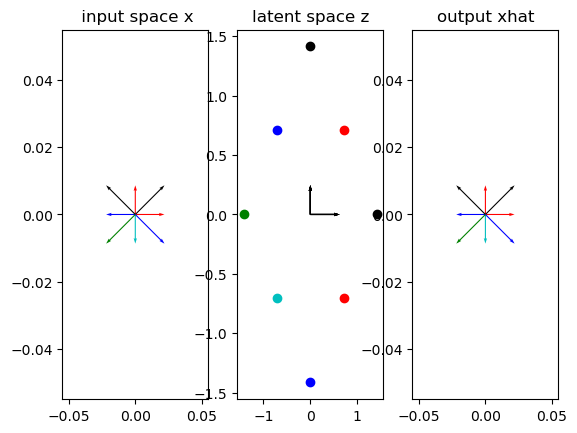

In [13]:
colors=['r','r','b','c','k','k','b','g','r'] 

for x,z,xhat,c in zip(X,Z,Xhat,colors):
    plt.subplot(131)
    
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)
    plt.title(' input space x') 
    plt.subplot(132)
    plt.plot(z[0].detach().numpy(),z[1].detach().numpy(),c+'o')
    plt.quiver([0],[0],0,1,scale=5,color='k')
    plt.quiver([0],[0],1,0,scale=5,color='k')
    plt.title('latent space z')
    plt.subplot(133)
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)

    plt.title('output xhat')
  
plt.show()

<h2 id="#1D"> Autoencoders with 1D Latent Space as Matrices</h2>

We Create an Autoencoder object with a 2D input and 1D latent space.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/DL0110EN/Version_3/Chapter_10/images/under_complete.png" width="500" alt="cognitiveclass.ai logo" />

In [14]:
auto_encoder_1Dcode=AutoEncoder(2,1)
auto_encoder_1Dcode

AutoEncoder(
  (encoder): Linear(in_features=2, out_features=1, bias=False)
  (decoder): Linear(in_features=1, out_features=2, bias=False)
)

we can plot the data.

In [15]:
W=torch.tensor([[1/2**(0.5),1/2**(0.5)]])
auto_encoder_2Dcode.state_dict()['encoder.weight'].data[:,:]=W

auto_encoder_2Dcode.state_dict()['decoder.weight'].data[:,:]=torch.transpose(W,0,1)

In [16]:
z=auto_encoder_1Dcode.encoder(torch.tensor([[1.0,1.0]]))
z

tensor([[0.3715]], grad_fn=<MmBackward0>)

we can generate the outputs; it's identical to the input:

In [17]:
x_hat=auto_encoder_1Dcode.decoder(z)
x_hat

tensor([[-0.1758, -0.2680]], grad_fn=<MmBackward0>)

We can produce the output by calling the forward function:

In [18]:
x_hat=auto_encoder_1Dcode(x)
x_hat

tensor([0.1758, 0.2680], grad_fn=<SqueezeBackward4>)

we can generate the code for multiple samples:

In [19]:
X=torch.tensor([[1.0,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]])
Z=auto_encoder_1Dcode.encoder(X)
Z

tensor([[ 0.1767],
        [ 0.1948],
        [-0.1767],
        [-0.1948],
        [ 0.3715],
        [ 0.0181],
        [-0.0181],
        [-0.3715]], grad_fn=<MmBackward0>)

The output is not the same, as there is not enough information to pass-through there encoder. As a result, all the output is vectors are scaler multiples of the vector $[1,1]$. 


In [20]:
Xhat=auto_encoder_1Dcode(X)
print('Xhat:')
print(Xhat)
print('X')
print(X)

Xhat:
tensor([[-0.0836, -0.1275],
        [-0.0922, -0.1405],
        [ 0.0836,  0.1275],
        [ 0.0922,  0.1405],
        [-0.1758, -0.2680],
        [-0.0086, -0.0130],
        [ 0.0086,  0.0130],
        [ 0.1758,  0.2680]], grad_fn=<MmBackward0>)
X
tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.],
        [ 1.,  1.],
        [-1.,  1.],
        [ 1., -1.],
        [-1., -1.]])


The following plot shows the input space and tensors or vectors on the left. The latent space and the code are on the right. Finally we have the code each point vector is mapped to a point on a 1D line. Finally, we have  the output all the vectors span the line equivalent to $y=x$ or a scaler multiple of the vector $[1,1]$. The corresponding samples are/' colour coded accordingly.

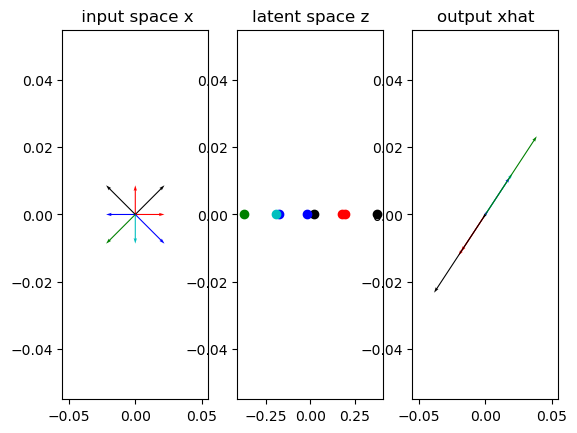

In [21]:
colors=['r','r','b','c','k','k','b','g','r'] 

for x,z,xhat,c in zip(X,Z,Xhat,colors):
    plt.subplot(131)
    
    plt.quiver([0],[0],x[0].numpy(),x[1].numpy(),scale=5,color=c)
    plt.title(' input space x') 
    plt.subplot(132)
    plt.plot(z[0].detach().numpy(),0,c+'o')

    plt.title('latent space z')
    plt.subplot(133)
    plt.quiver([0],[0],10*xhat[0].detach().numpy(),10*xhat[1].detach().numpy(),scale=5,color=c)

    plt.title('output xhat')
  
plt.show()

<!--Empty Space for separating topics-->

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

<hr>

Copyright &copy; 2020 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.